### 2.1 数据操作

#### 2.1.1入门

In [5]:
import torch

X = torch.arange(12)
X.numel()

12

In [7]:
X.reshape(3, 4)


tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [8]:
#如果不能确定一个维度，可以用-1代替
X.reshape(-1, 3)

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

标准差为1，均值为0的高斯正态分布

In [11]:
X = torch.randn(3, 4)
X.mean(0)

tensor([ 0.0319,  0.3045, -0.3569,  0.6147])

In [12]:
import numpy as np
torch.tensor(np.arange(12).reshape(3, 4))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]], dtype=torch.int32)

#### 2.1.2运算

In [18]:
x = torch.tensor(np.arange(2, 10, 2))
print(x)
y = torch.tensor(np.ones(4) + 1)
print(y)
x + y, x / y, x ** y#这点就比tf好
#tf还得搞数据类型转换 就离谱

tensor([2, 4, 6, 8], dtype=torch.int32)
tensor([2., 2., 2., 2.], dtype=torch.float64)


(tensor([ 4.,  6.,  8., 10.], dtype=torch.float64),
 tensor([1., 2., 3., 4.], dtype=torch.float64),
 tensor([ 4., 16., 36., 64.], dtype=torch.float64))

把多个张量连接在一起

In [34]:
X = torch.arange(12, dtype=torch.float32).reshape(-1, 4)
print(X)
Y = torch.tensor(np.arange(12).reshape(3, 4)[::-1, :].copy())
print(Y)

torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([[ 8,  9, 10, 11],
        [ 4,  5,  6,  7],
        [ 0,  1,  2,  3]], dtype=torch.int32)


(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 8.,  9., 10., 11.],
         [ 4.,  5.,  6.,  7.],
         [ 0.,  1.,  2.,  3.]]),
 tensor([[ 0.,  1.,  2.,  3.,  8.,  9., 10., 11.],
         [ 4.,  5.,  6.,  7.,  4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.,  0.,  1.,  2.,  3.]]))

In [35]:
print(X.sum())
print(X.sum(0))

tensor(66.)
tensor([12., 15., 18., 21.])


#### 2.1.3广播机制

In [37]:
a = torch.arange(3).reshape(3, 1)
b = torch.arange(2).reshape(-1, 2)
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [38]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

#### 2.1.5节省内存
如果进行Y = X + Y 的操作，那么Y指向的张量地址会发生变化（先回收原来的内存地址，然后分配计算完的新的内存地址，然后再让Y指向新的内存地址）
可以使用原地操作，导致不用重新分配内存

In [41]:
before = id(Y)
Y = Y + X
before, id(Y)#可以看到先后内存地址不同

(2158702893880, 2158702866248)

In [42]:
Z = torch.zeros_like(Y)#创建一个形状和Y一样，但是数值全部为0的张量
print(id(Z), Z)
Z[:] = X +Y
print(id(Z), Z)


2158702472792 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
2158702472792 tensor([[ 8., 13., 18., 23.],
        [20., 25., 30., 35.],
        [32., 37., 42., 47.]])


#### 2.1.6转换为其他Python对象

In [43]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [46]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

### 2.3 线性代数

#### 2.3.1 标量
- 标量只有一个数表示

#### 2.3.4 张量
- 提供描述具有任意数量轴的n维数组的通用方法
- 向量是一阶张量，矩阵是二阶张量

#### 2.3.5 张量算法的基本性质
通过重新分配内存 clone 可以将A的一个副本分配给B


In [47]:
A= torch.arange(20, dtype=torch.float32).reshape(-1, 4)
B = A.clone()
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

#### 2.3.6降维
通过对行和列分别求和，等价于对矩阵的所有元素进行求和

In [49]:
A.sum(axis=[0, 1])

tensor(190.)

In [50]:
A.mean(), A.sum() / A.numel()#numel是元素个数

(tensor(9.5000), tensor(9.5000))

In [54]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]#shape是一个元组，列出了张量延每个轴的长度

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

##### 2.3.6.1 非降维求和


In [55]:
sum_A = A.sum(axis=1, keepdims=True)#求和之后仍然保持两个轴
sum_A, A.sum(axis=1)

(tensor([[ 6.],
         [22.],
         [38.],
         [54.],
         [70.]]),
 tensor([ 6., 22., 38., 54., 70.]))

In [57]:
A / sum_A #可以通过广播相除

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

#### 2.3.7 点积
点积是相同位置的元素按位置相乘的和

In [59]:
y = torch.ones(4, dtype=torch.float32)
x = torch.arange(4, dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

也可以通过元素乘法，然后求和

In [60]:
torch.sum(x * y)

tensor(6.)

#### 2.3.8 矩阵 向量积


In [61]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

#### 2.3.9 矩阵乘法

In [62]:
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

#### 2.3.10 范数

In [64]:
u = torch.arange(3, 5, dtype=torch.float32)
torch.norm(u)

tensor(5.)

### 2.5 自动求导

In [1]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [2]:
x.requires_grad_(True)
x.grad

In [4]:
y = 2 * torch.dot(x, x)#矩阵对应位相乘
y

tensor(28., grad_fn=<MulBackward0>)

调用反向传播函数自动计算y关于x每个分量的梯度。

In [5]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

函数y=2x²的梯度应该是4x

In [6]:
x.grad == 4 * x

tensor([True, True, True, True])

In [10]:
#在默认情况下，pytorch会累积梯度，要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

#### 2.5.2 非标量变量的反向传播
当y不是标量的时候，向量y关于向量x的导数是一个矩阵。
对于高阶和高维的y和x，求导的结果可以是一个高阶张量
这里计算的不是微分矩阵，而是批量中每个样本单独计算的偏导数之和

In [30]:
x.grad.zero_()
y = x * x 
y.sum().backward()
x.grad

True


In [47]:
x.grad.zero_()
y = x * x 
u = y.detach()#截断反向传播的梯度流
z = u * x


z.sum().backward()
x.grad == u
print(y.requires_grad)
x.grad

True


tensor([0., 1., 4., 9.])

In [48]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

#### 练习5 画出sin(x) 和导数的图像

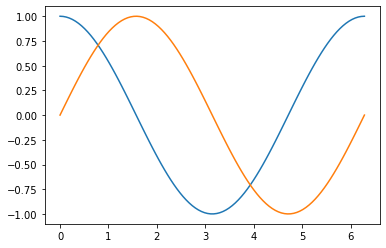

In [77]:
import matplotlib.pyplot as plt
import numpy as np
#x = torch.tensor(torch.linspace(0, np.pi/2, 20))
x = np.linspace(0, 2 * np.pi, 100)
x1 = torch.tensor(x)
x1.requires_grad_(True)
y1 = torch.sin(x1)
y1.sum().backward()
plt.plot(x1.detach().numpy(), x1.grad.detach().numpy())
plt.plot(x1.detach().numpy(), y1.detach().numpy())

In [81]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
x = torch.arange(0.0,10.0,0.1)
x.requires_grad_(True)
x1 = x.detach()
y1 = torch.sin(x1)
y2 = torch.sin(x)
y2.sum().backward()
plt.plot(x1,y1)
plt.plot(x1,x.grad)

RuntimeError: Trying to backward through the graph a second time (or directly access saved variables after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved variables after calling backward.